In [914]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 9]

In [915]:
data_wage = pd.read_csv("./data/monthly-wage.csv", sep=";")

In [916]:
data_wage.Month = data_wage.Month.apply(lambda x: datetime.timestamp((datetime.strptime(x, "%Y-%m"))))

In [917]:
m = 200
n = len(data_wage.Month)

X_train = data_wage.Month[0:m]
y_train = data_wage["Real wage"][0:m]

X_test = data_wage.Month[m:n]
y_test = data_wage["Real wage"][m:n]

In [918]:
import time

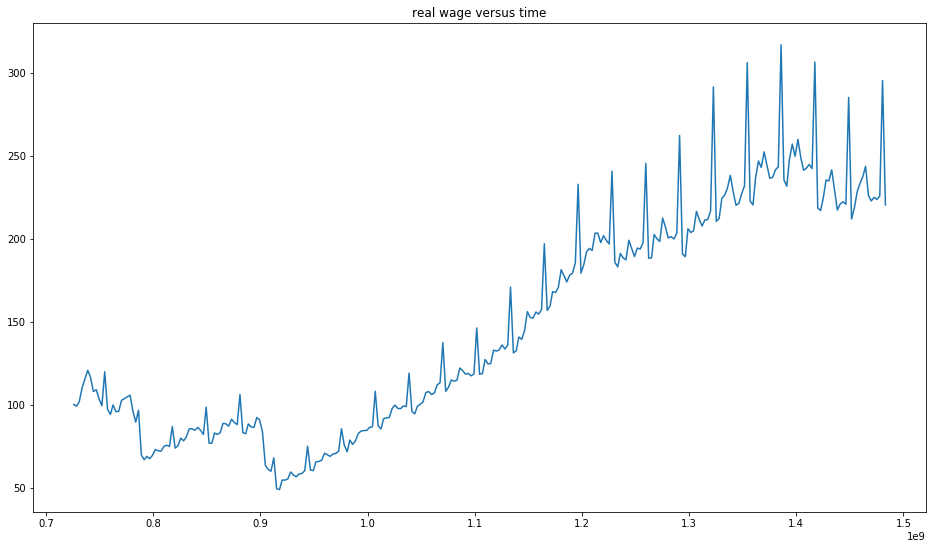

In [919]:
plt.title("real wage versus time")
plt.plot(data_wage.Month, data_wage["Real wage"]);

In [920]:
class LRTS(object):
    def __init__(self, window, error, d = 1):
        self.window = window
        self.error = error
        self.d = d
        
    def fit(self, data, target):
        self.target = target
        data = np.reshape(np.array(data[::self.d][:self.window]), (1, self.window))
        target = np.reshape(np.array(target[::self.d][:self.window]), (1, self.window))
        
        self.w = np.linalg.pinv(data.T.dot(data)).dot(data.T).dot(target)
    
    def predict(self, data):
        result = []
        i = 0
        while(i+self.window<len(data)):
            result.append(data[i:i+self.window].dot(self.w)+self.error)
            i += self.window
        return np.array(result).ravel()
    
    def plot_predict(self, data):
        plt.plot(data[:len(self.predict(data))], self.predict(data), label = "Predicted")
        plt.plot(data[:len(self.predict(data))], self.smoothen(self.predict(data)), 
                 label = "Predicted Smoothened")
        plt.legend(loc='best')
    
    def smoothen(self, target):
        target = target[::-1]
        smooth = []
        for i in range(target.shape[0]):
            smooth.append(np.mean(target[i:i+self.window-6]))
        return smooth[::-1]
    
    def plot_smoothened(self, data, target):        
        x = data
        y = target
        y_smooth=signal.savgol_filter(y, self.window, 3)
        
        plt.plot(x, y_smooth, label = "Savgol filter")
        plt.plot(data, smoothen(target, self.window), label = "Self Smoothened")
        plt.legend(loc='best')

In [921]:
model = LRTS(15, 24) 

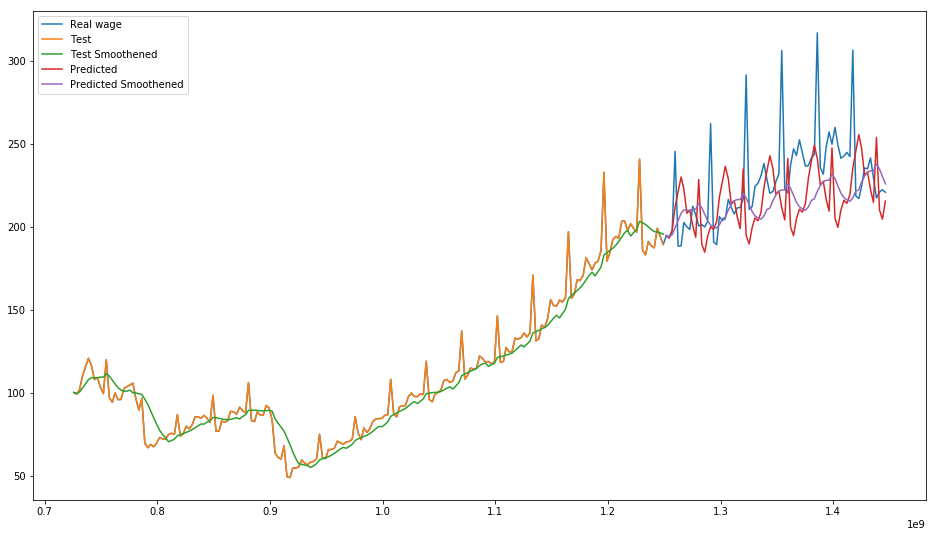

In [922]:
model.fit(X_train, y_train)
k = m+len(model.predict(X_test))
plt.plot(data_wage.Month[:k], data_wage["Real wage"][:k])
plt.plot(X_train, y_train, label = "Test")
plt.plot(X_train, model.smoothen(y_train), label = "Test Smoothened")
model.plot_predict(X_test)

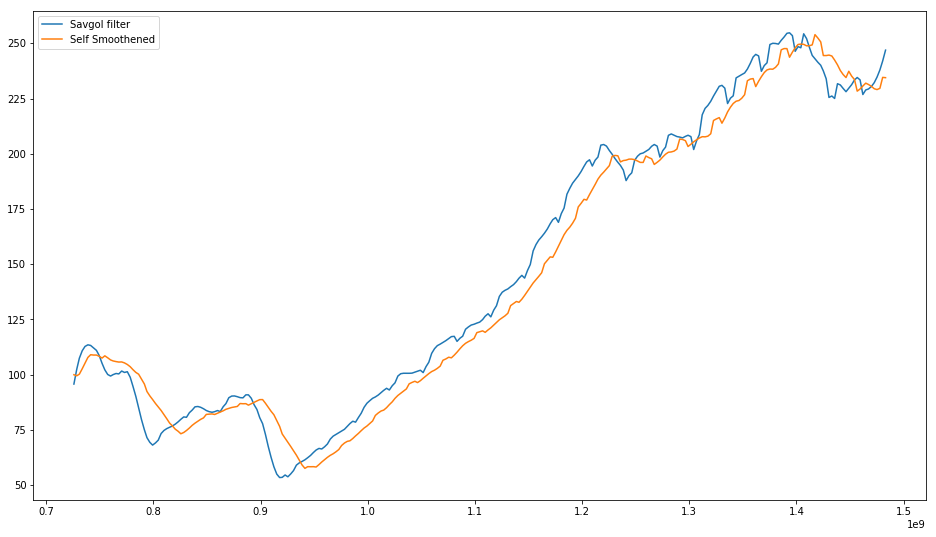

In [923]:
model.plot_smoothened(data_wage.Month, data_wage["Real wage"])